# EDA of retail transaction dataset

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.rcParams['figure.figsize'] = [16, 8]

In [2]:
data= '../data/dataset01_sfu_hierarchical_forecast_project.csv'
df = pd.read_csv(data,)# index_col='Unnamed: 0')


In [3]:
df

,Unnamed: 0,year,month,week,province,city,store,category,department,class,vendor,size,totalQuantity,totalSales
0,0,2012,1,1,province3,city31,store40,category1,department1,class7,vendor2,size26,1.0,424.971081
1,1,2012,1,1,province2,city15,store33,category1,department1,class7,vendor2,size29,-1.0,-424.971081
2,3,2012,1,1,province1,city18,store51,category1,department1,class7,vendor2,size29,1.0,424.971081
3,4,2012,1,1,province3,city31,store62,category1,department1,class7,vendor2,size29,1.0,424.971081
4,5,2012,1,1,province3,city31,store40,category1,department1,class7,vendor2,size33,1.0,424.971081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2348925,2639097,2018,1,1,province2,city12,store31,category2,department12,class41,vendor11,size1,2.0,85.708453
2348926,2639098,2018,1,1,province1,city39,store43,category2,department12,class41,vendor11,size1,2.0,85.708453
2348927,2639099,2018,1,1,province1,city23,store56,category2,department12,class41,vendor11,size1,1.0,42.854227
2348928,2639100,2018,1,1,province1,city35,store45,category2,department12,class41,vendor84,size1,1.0,103.564381


In [4]:
df['time'] = df['year'].astype(str) + " " + df['week'].astype(str) + " 0"
df['time'] = pd.to_datetime(df['time'], format="%Y %W %w")
df = df.set_index(df['time'])
df = df.drop(columns='time')
df

,Unnamed: 0,year,month,week,province,city,store,category,department,class,vendor,size,totalQuantity,totalSales
time,,,,,,,,,,,,,,
2012-01-08,0,2012,1,1,province3,city31,store40,category1,department1,class7,vendor2,size26,1.0,424.971081
2012-01-08,1,2012,1,1,province2,city15,store33,category1,department1,class7,vendor2,size29,-1.0,-424.971081
2012-01-08,3,2012,1,1,province1,city18,store51,category1,department1,class7,vendor2,size29,1.0,424.971081
2012-01-08,4,2012,1,1,province3,city31,store62,category1,department1,class7,vendor2,size29,1.0,424.971081
2012-01-08,5,2012,1,1,province3,city31,store40,category1,department1,class7,vendor2,size33,1.0,424.971081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-07,2639097,2018,1,1,province2,city12,store31,category2,department12,class41,vendor11,size1,2.0,85.708453
2018-01-07,2639098,2018,1,1,province1,city39,store43,category2,department12,class41,vendor11,size1,2.0,85.708453
2018-01-07,2639099,2018,1,1,province1,city23,store56,category2,department12,class41,vendor11,size1,1.0,42.854227


In [5]:
# Necessary package for determining whether a day falls on a Canadian Federal Holiday.
# !~/anaconda3/bin/conda install workalendar

In [6]:
# !~/anaconda3/bin/conda list
# !which python

In [5]:
# Create label for whether transaction occurred on a holiday week.

from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

from workalendar.america import Canada

minyear = df.index.min().year
maxyear = df.index.max().year

dr = pd.date_range(start=str(minyear), end=str(maxyear))

# USFederal Holidays as per calendar
cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())
holidays_week = holidays.year.astype(str) + " " + holidays.week.astype(str) + " 0"
holidays_week = pd.to_datetime(holidays_week, format="%Y %W %w")
# print(holidays_week)

df['Holiday'] = df.index.isin(holidays_week) # Create boolean field for whether this transaction occured on a holiday week

# print(df.count(), df['Holiday'].sum())
df

# Canadian federal holidays as per `workalender` package
canada = Canada()

# Retrieve holidays for relevant years
can_holiday = []
[can_holiday.extend(canada.holidays(y)) for y in range(minyear, maxyear) ]

can_holiday = np.array(can_holiday)
can_holiday = pd.DataFrame(can_holiday, columns=['Date', 'event'])
# print(can_holiday)

# Convert holidays to Datetime object
can_holiday['Date'] = pd.to_datetime(can_holiday['Date'].astype(str), format="%Y-%M-%d")

# Represent Datetime in (year, week, end of week) format
can_holidays_week = can_holiday.Date.dt.year.astype(str) + " " + can_holiday.Date.dt.week.astype(str) + " 0"
can_holidays_week = pd.to_datetime(can_holidays_week, format="%Y %W %w")

df['Holiday'] = df.index.isin(can_holidays_week) | df['Holiday'] # Create boolean field for whether this transaction occured on a holiday week

# print(df.count(), df['Holiday'].sum())
df

,Unnamed: 0,year,month,week,province,city,store,category,department,class,vendor,size,totalQuantity,totalSales,Holiday
time,,,,,,,,,,,,,,,
2012-01-08,0,2012,1,1,province3,city31,store40,category1,department1,class7,vendor2,size26,1.0,424.971081,True
2012-01-08,1,2012,1,1,province2,city15,store33,category1,department1,class7,vendor2,size29,-1.0,-424.971081,True
2012-01-08,3,2012,1,1,province1,city18,store51,category1,department1,class7,vendor2,size29,1.0,424.971081,True
2012-01-08,4,2012,1,1,province3,city31,store62,category1,department1,class7,vendor2,size29,1.0,424.971081,True
2012-01-08,5,2012,1,1,province3,city31,store40,category1,department1,class7,vendor2,size33,1.0,424.971081,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-07,2639097,2018,1,1,province2,city12,store31,category2,department12,class41,vendor11,size1,2.0,85.708453,True
2018-01-07,2639098,2018,1,1,province1,city39,store43,category2,department12,class41,vendor11,size1,2.0,85.708453,True
2018-01-07,2639099,2018,1,1,province1,city23,store56,category2,department12,class41,vendor11,size1,1.0,42.854227,True


In [6]:
#df.to_csv('../data/dataset-02.csv')

In [7]:
# yw = df.groupby(['year','week']).agg({'totalSales':'sum'})
# yw = yw.reset_index()
# print(yw)

# # plt.bar(x='week', height='totalSales', data=yw);
# # sns.barplot(x='week', y='totalSales', data = yw);
# sns.barplot(x='week', y='totalSales', data = yw);

In [8]:
fil_rows = (df['store'] == 'store2') & (df['class'] == 'class4')

In [9]:
new_df = df[fil_rows]

In [10]:
new_df.shape

(6328, 15)

In [11]:
new_df.head(5)

,Unnamed: 0,year,month,week,province,city,store,category,department,class,vendor,size,totalQuantity,totalSales,Holiday
time,,,,,,,,,,,,,,,
2012-01-08,2695,2012,1,1,province2,city16,store2,category1,department2,class4,vendor3,size26,5.0,1024.001746,True
2012-01-08,2814,2012,1,1,province2,city16,store2,category1,department2,class4,vendor44,size36,2.0,214.128286,True
2012-01-08,2840,2012,1,1,province2,city16,store2,category1,department2,class4,vendor63,size29,1.0,126.419969,True
2012-01-08,2842,2012,1,1,province2,city16,store2,category1,department2,class4,vendor63,size33,1.0,126.419969,True
2012-01-08,2843,2012,1,1,province2,city16,store2,category1,department2,class4,vendor63,size36,2.0,252.839937,True


In [12]:
ts_df = new_df['totalSales']
ts_df = ts_df.to_frame()


In [13]:
ts_df = ts_df.groupby(ts_df.index).agg({'totalSales':'sum'})

In [14]:
ts_df.shape

(313, 1)

In [15]:
ts_df.head()

,totalSales
time,
2012-01-08,2900.731178
2012-01-15,6533.269699
2012-01-22,4149.146223
2012-01-29,6943.456071
2012-02-05,4287.493952


In [16]:
ts_df.tail()

,totalSales
time,
2017-12-10,16818.498363
2017-12-17,18425.317591
2017-12-24,18570.736267
2017-12-31,15937.415463
2018-01-07,4740.963093


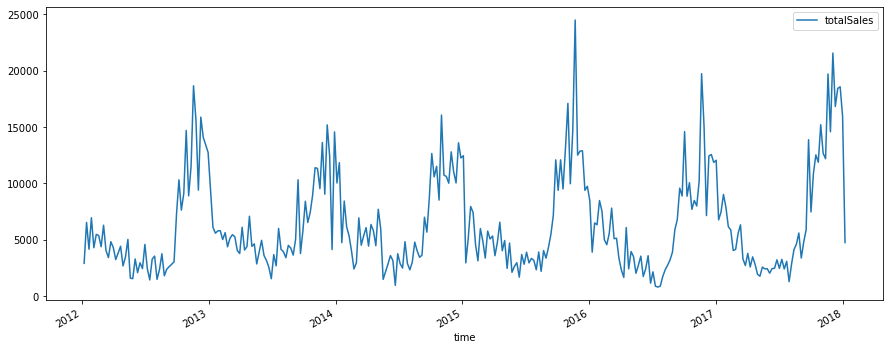

In [17]:
ts_df.plot(figsize=(15, 6))
plt.show()

C:\Users\Karan\Anaconda3\envs\forecast\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Karan\Anaconda3\envs\forecast\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Karan\Anaconda3\envs\forecast\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Karan\Anaconda

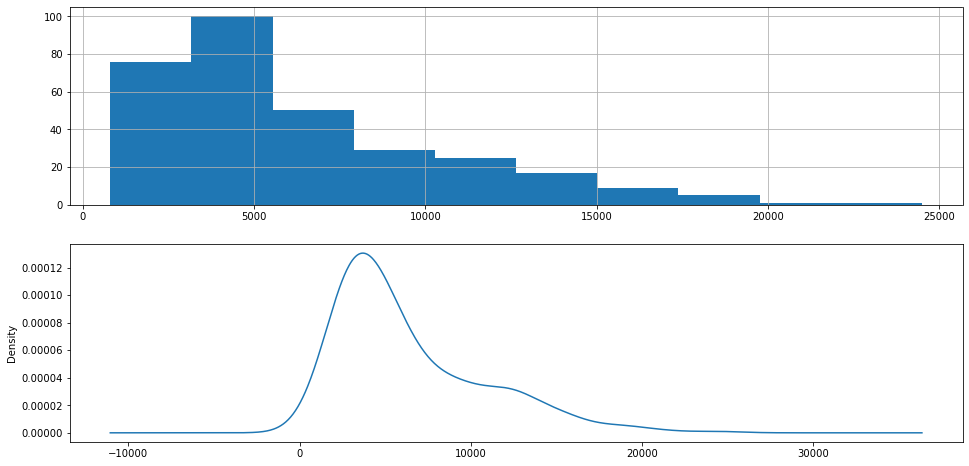

In [18]:
from pandas import Series
from matplotlib import pyplot
pyplot.figure(1)
pyplot.subplot(211)
ts_df.totalSales.hist()
pyplot.subplot(212)
ts_df.totalSales.plot(kind='kde')
pyplot.show()

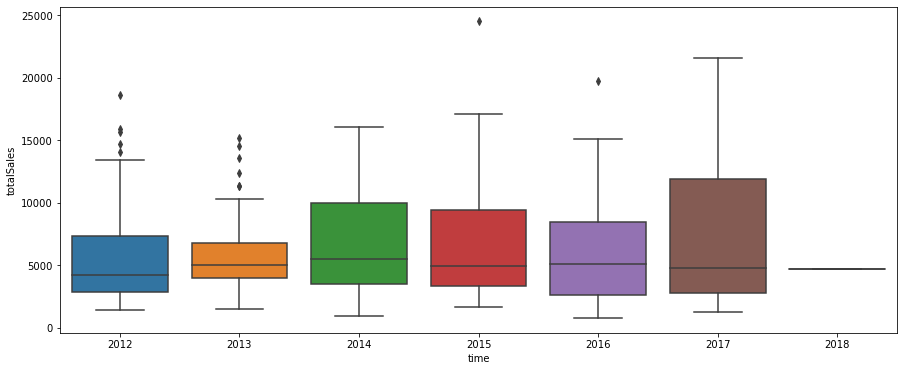

In [19]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(ts_df.totalSales.index.year,ts_df.totalSales, ax=ax)

C:\Users\Karan\Anaconda3\envs\forecast\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


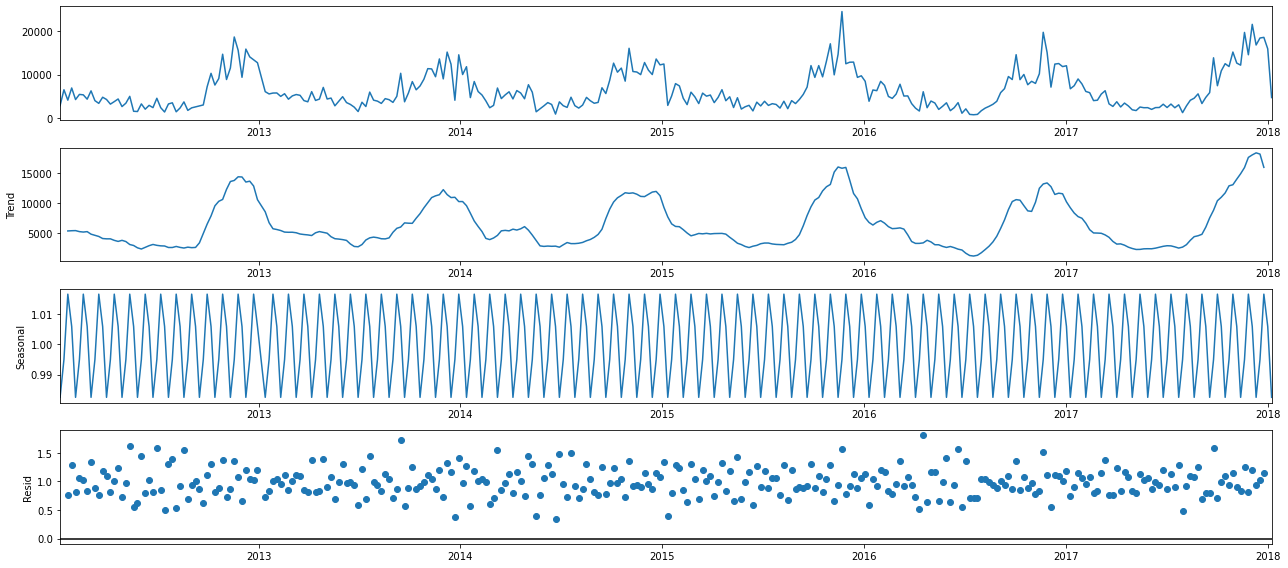

In [20]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ts_df, model='multiplicative',freq = 4)
fig = decomposition.plot()
plt.show()

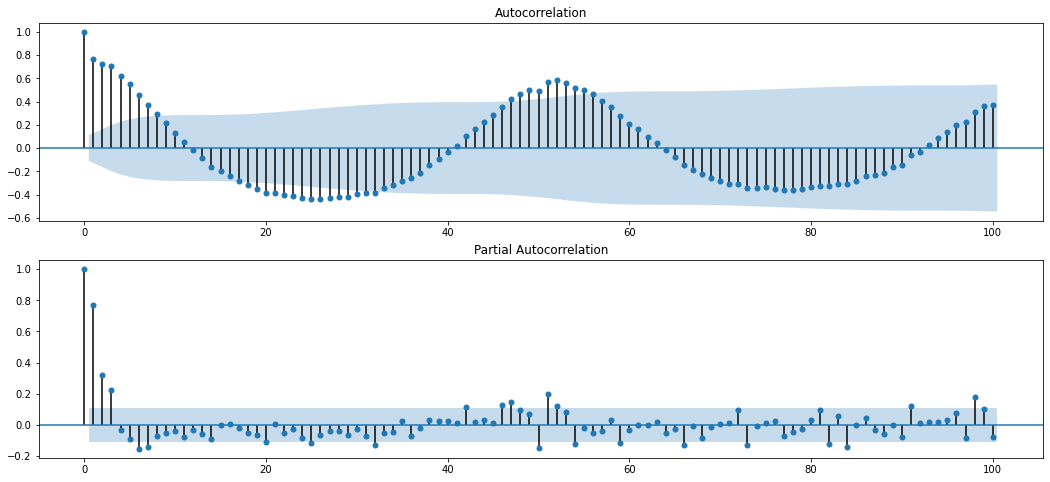

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

pyplot.figure()
pyplot.subplot(211)
plot_acf(ts_df.totalSales, ax=pyplot.gca(), lags = 100)
pyplot.subplot(212)
plot_pacf(ts_df.totalSales, ax=pyplot.gca(), lags = 100)
pyplot.show()

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:

#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(ts_df.totalSales, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -4.569437
p-value                          0.000147
#Lags Used                       6.000000
Number of Observations Used    306.000000
Critical Value (1%)             -3.451902
Critical Value (5%)             -2.871032
Critical Value (10%)            -2.571827
dtype: float64


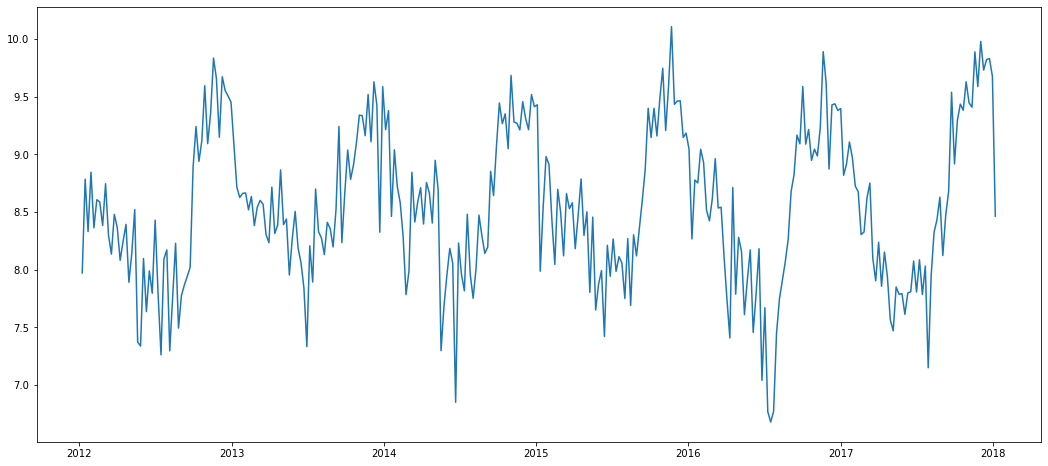

In [24]:
ts_log = np.log(ts_df)
plt.plot(ts_log)

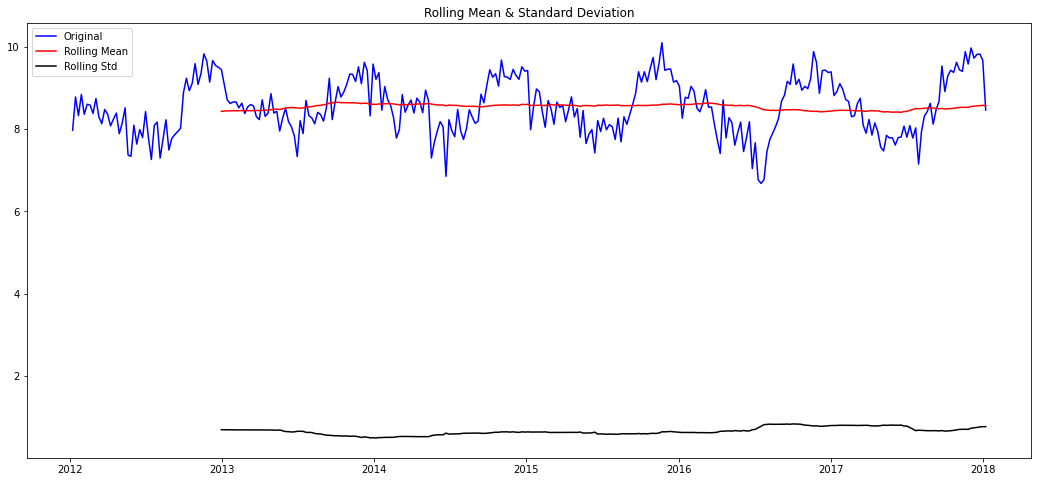

Results of Dickey-Fuller Test:
Test Statistic                  -4.623973
p-value                          0.000117
#Lags Used                       7.000000
Number of Observations Used    305.000000
Critical Value (1%)             -3.451974
Critical Value (5%)             -2.871063
Critical Value (10%)            -2.571844
dtype: float64


In [27]:

test_stationarity(ts_log)

In [26]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window = 52).mean()
    rolstd = timeseries.rolling(window = 52).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [28]:
from statsmodels.tsa.ar_model import AR
from random import random

In [29]:
# fit model
model = AR(ts_log)
model_fit = model.fit()

C:\Users\Karan\Anaconda3\envs\forecast\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, Futu

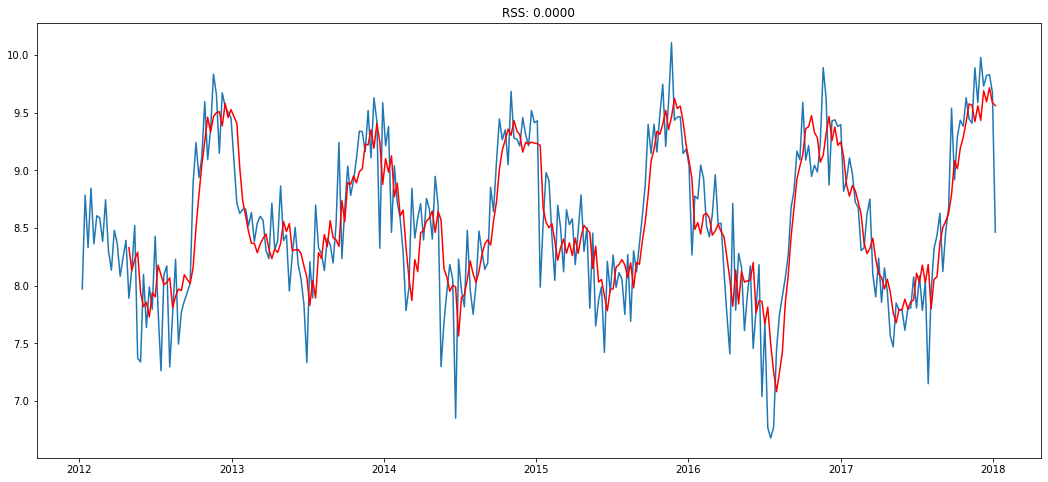

In [30]:
plt.plot(ts_log)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.nansum((model_fit.fittedvalues-ts_log)**2))
plt.show()

In [32]:

predictions_ARIMA_log = pd.Series(model_fit.fittedvalues, copy=True)
print (predictions_ARIMA_log.head())

time
2012-04-29    8.329473
2012-05-06    8.131517
2012-05-13    8.227399
2012-05-20    8.289849
2012-05-27    7.940019
dtype: float64


In [33]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

Text(0.5, 1.0, 'RMSE: 12258.8862')

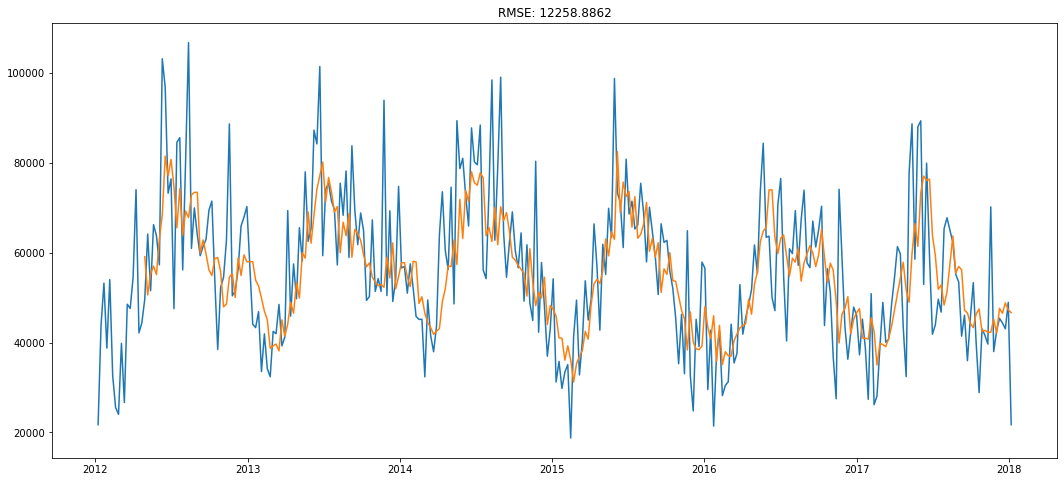

In [40]:

plt.plot(ts_df.totalSales)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(np.nansum((predictions_ARIMA-ts_df.totalSales)**2)/len(ts_df.totalSales)))

In [34]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

In [35]:
# MA example
from statsmodels.tsa.arima_model import ARMA
from random import random

# fit model
model = ARMA(ts_log, order=(0, 1))
model_fit = model.fit(disp=False)

C:\Users\Karan\Anaconda3\envs\forecast\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [36]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             totalSales   No. Observations:                  313
Model:                     ARMA(0, 1)   Log Likelihood                -241.184
Method:                       css-mle   S.D. of innovations              0.523
Date:                Wed, 11 Mar 2020   AIC                            488.368
Time:                        21:42:19   BIC                            499.606
Sample:                             0   HQIC                           492.859
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.5408      0.046    183.916      0.000       8.450       8.632
ma.L1.totalSales     0.5740      0.039     14.753      0.000       0.498       0.650
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.7420           +0.0000j            1.7420            0.5000
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'RSS: 0.0000')

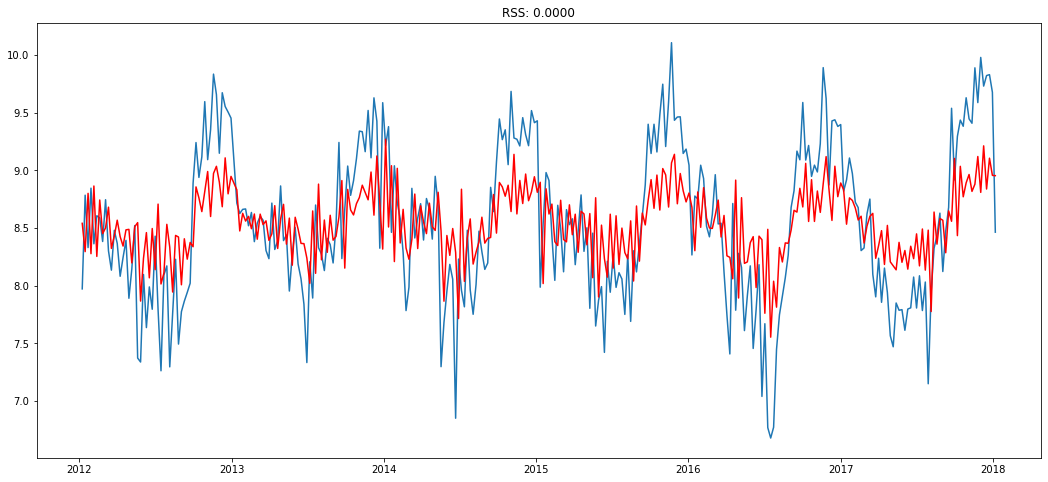

In [37]:
plt.plot(ts_log)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.nansum((model_fit.fittedvalues-ts_log)**2))

In [38]:
# ARMA example
from statsmodels.tsa.arima_model import ARMA
from random import random

# fit model
model = ARMA(ts_log, order=(2, 1))
model_fit = model.fit(disp=False)

C:\Users\Karan\Anaconda3\envs\forecast\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [39]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             totalSales   No. Observations:                  313
Model:                     ARMA(2, 1)   Log Likelihood                -151.549
Method:                       css-mle   S.D. of innovations              0.392
Date:                Wed, 11 Mar 2020   AIC                            313.099
Time:                        21:42:30   BIC                            331.830
Sample:                             0   HQIC                           320.584
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.5501      0.172     49.671      0.000       8.213       8.887
ar.L1.totalSales     0.8090      0.106      7.615      0.000       0.601       1.017
ar.L2.totalSales     0.1109      0.093      1.189      0.234      -0.072       0.294
ma.L1.totalSales    -0.3538      0.094     -3.766      0.000      -0.538      -0.170
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0771           +0.0000j            1.0771            0.0000
AR.2           -8.3756           +0.0000j            8.3756            0.5000
MA.1            2.8264           +0.0000j            2.8264            0.0000
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'RSS: 0.0000')

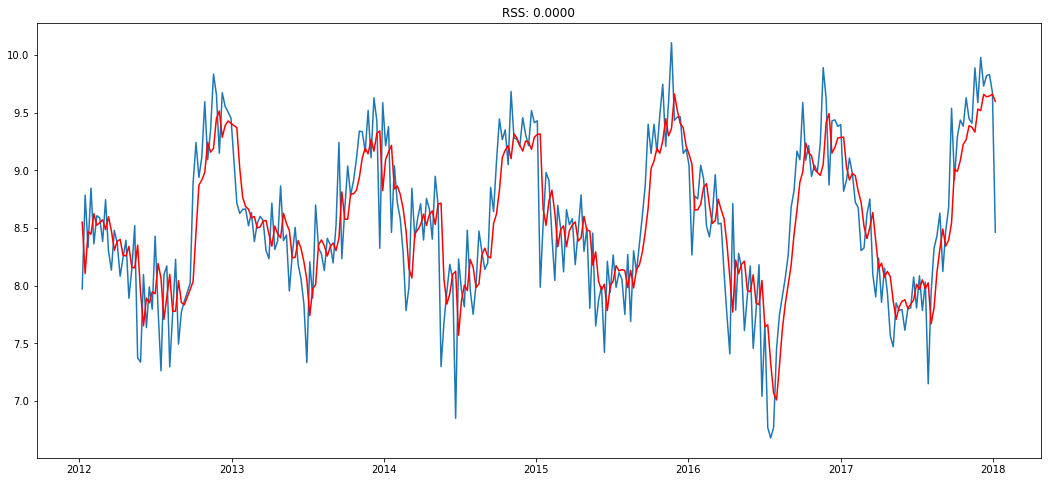

In [40]:
plt.plot(ts_log)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.nansum((model_fit.fittedvalues-ts_log)**2))

In [41]:
ts = ts_df.totalSales - ts_df.totalSales.shift()
ts.dropna(inplace=True)

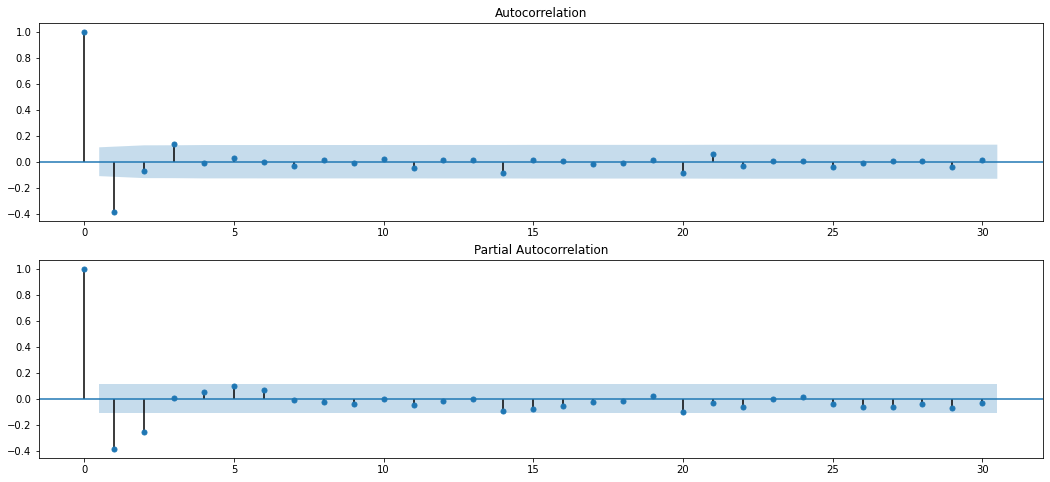

In [44]:
pyplot.figure()
pyplot.subplot(211)
plot_acf(ts, ax=pyplot.gca(),lags=30)
pyplot.subplot(212)
plot_pacf(ts, ax=pyplot.gca(),lags=30)
pyplot.show()

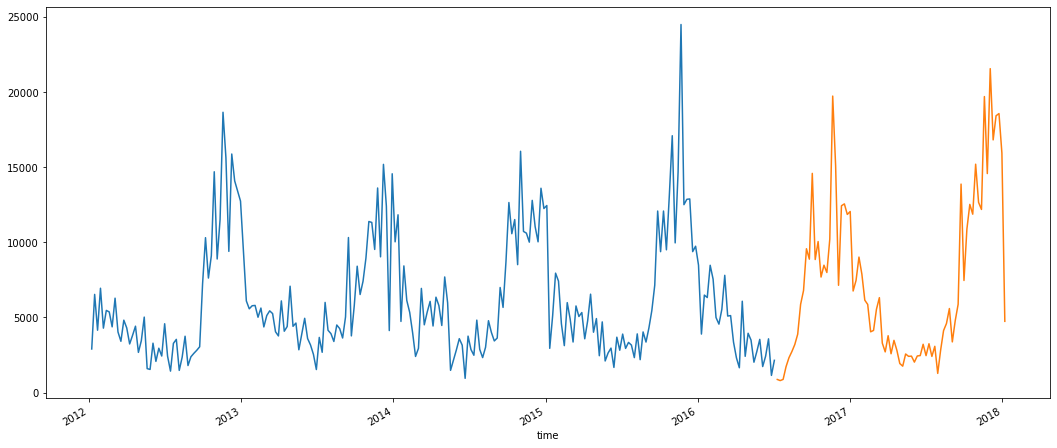

In [52]:
#divide into train and validation set
train = ts_df[:int(0.75*(len(ts_df)))]
valid = ts_df[int(0.75*(len(ts_df))):]

#plotting the data
train['totalSales'].plot()
valid['totalSales'].plot()

In [46]:
# ARIMA example
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# fit model
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit(disp=1)

C:\Users\Karan\Anaconda3\envs\forecast\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Karan\Anaconda3\envs\forecast\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


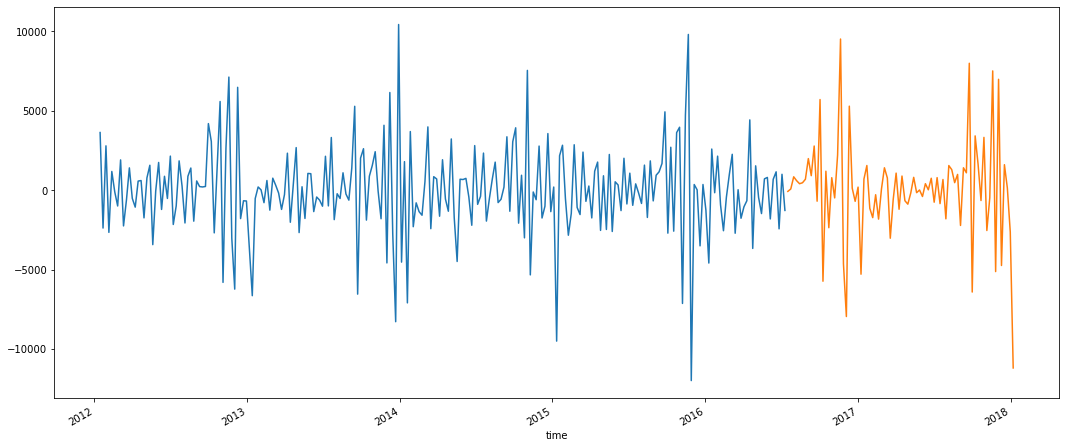

In [62]:
#divide into train and validation set
train_ts = ts[:int(0.75*(len(ts)))]
valid_ts = ts[int(0.75*(len(ts))):]

#plotting the data
train_ts['totalSales'].plot()
valid_ts['totalSales'].plot()

In [60]:
#ts = ts.to_frame()
type(ts)
ts=ts.dropna()

In [47]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.totalSales   No. Observations:                  233
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2151.313
Method:                       css-mle   S.D. of innovations           2473.715
Date:                Wed, 11 Mar 2020   AIC                           4310.627
Time:                        21:44:48   BIC                           4324.431
Sample:                             1   HQIC                          4316.193
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -9.9512     83.184     -0.120      0.905    -172.988     153.086
ar.L1.D.totalSales    -0.1333      0.098     -1.356      0.175      -0.326       0.059
ma.L1.D.totalSales    -0.4204      0.079     -5.295      0.000      -0.576      -0.265
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -7.5001           +0.0000j            7.5001            0.5000
MA.1            2.3788           +0.0000j            2.3788            0.0000
-----------------------------------------------------------------------------
"""

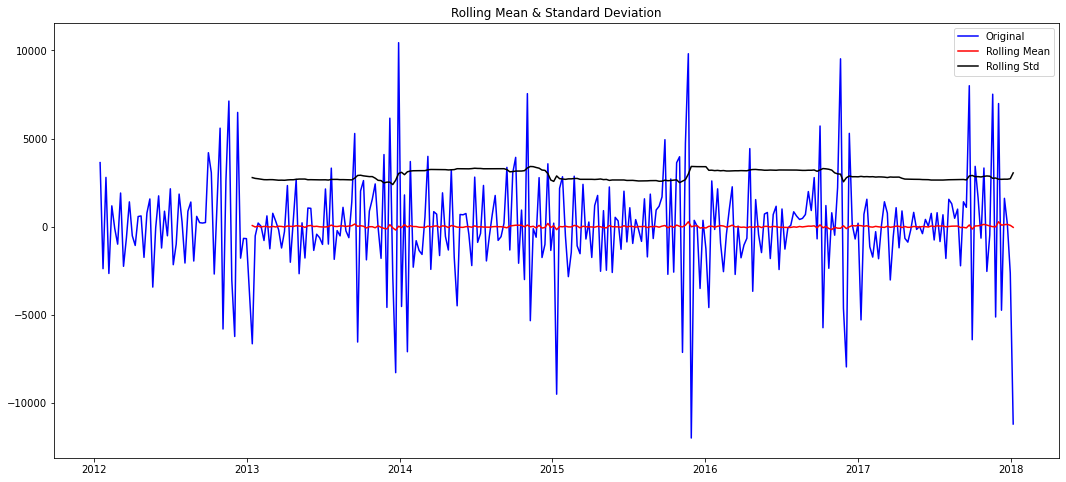

Results of Dickey-Fuller Test:
Test Statistic                 -18.998413
p-value                          0.000000
#Lags Used                       1.000000
Number of Observations Used    310.000000
Critical Value (1%)             -3.451622
Critical Value (5%)             -2.870909
Critical Value (10%)            -2.571762
dtype: float64


In [74]:
test_stationarity(ts)

In [66]:
# ARIMA example
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# fit model
model_ts = ARIMA(train_ts, order=(1, 1, 0))
model_fit_ts = model_ts.fit(disp=1)

C:\Users\Karan\Anaconda3\envs\forecast\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Karan\Anaconda3\envs\forecast\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [70]:
start_index = 234
end_index = 312
#train.iloc[233]
#train.head()
#end_index
#Predictions
#valid.iloc[78]
predictions = model_fit_ts.predict(start=start_index, end=end_index)

C:\Users\Karan\Anaconda3\envs\forecast\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [73]:
# report performance
mse = mean_squared_error(ts[233:314], predictions)
rmse = sqrt(mse)
print('RMSE: {}, MSE:{}'.format(rmse,mse))

RMSE: 3198.1368155399764, MSE:10228079.09091218
